In [163]:
import pandas as pd
import numpy as np
import pyexcel_xlsx
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['dist']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [191]:
pylab.rcParams['figure.figsize'] = (22.0, 10.0)
matplotlib.rcParams.update({'font.size': 25,'legend.fontsize':25})#,'font.family': 'serif'})
rc('axes', linewidth=3)
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import AutoMinorLocator

In [164]:
data = pd.read_excel(r'/Users/lszczyrba/Project_3.6.3/HelloWorld/Irma_Sediment/Distances.xlsx', header = [0])
df = pd.DataFrame(data)

In [165]:
def haversine(lon1, lat1, lon2, lat2):
    if lon1 == 'nan':
        transect_dist = 0
    else:
            
        lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
        dlon = lon2 - lon1
        dlat = lat2 - lat1
        a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
        c = 2 * math.asin(math.sqrt(a))
        km = 6367 * c


        x = math.sin(dlon) * math.cos(lat2)
        y = math.cos(lat1) * math.sin(lat2) - (math.sin(lat1)
                * math.cos(lat2) * math.cos(dlon))

        initial_bearing = math.atan2(x, y)

        # Now we have the initial bearing but math.atan2 return values
        # from -180° to + 180° which is not what we want for a compass bearing
        # The solution is to normalize the initial bearing as shown below
    #     initial_bearing = math.degrees(initial_bearing)
        compass_bearing = (initial_bearing + 360) % 360
        bearing = math.radians(compass_bearing)
        theta = math.cos(bearing)
        transect_dist = ((km*1000)*math.cos(bearing))
        print(bearing, theta, km, transect_dist)
    return (transect_dist)

In [166]:
site_lat = df['Lat']
site_lon = df['Lon']
ocean_lat = df['water_lat']
ocean_lon = df['water_lon']

distance = []
for i in range(len(site_lat)):
    dist = haversine(site_lon[i], site_lat[i], ocean_lon[i], ocean_lat[i])
    distance.append(dist)
dist = pd.DataFrame({'Dist': distance})
df = df.join(dist) 
dist


6.23327626736629 0.9987548023778203 0.0706899258736152 70.60190294600531
6.234035450554367 0.9987923889292443 0.07400623694785323 73.91686619681002
6.233970655176356 0.998789203431078 0.06220032437438365 62.12501243504531
6.235994845522158 0.998886736784787 0.0676053836956671 67.53012110884835
6.24316349308921 0.999199234092291 0.04219080238904771 42.157017432875676
6.243354655576579 0.9992068644626172 0.04442660747144801 44.39137115025705
6.242858170416984 0.9991869712134582 0.049617866869756756 49.577526115664845
6.242085050012165 0.9991555033196015 0.048939829614009105 48.898500090360805
6.269717706008716 0.999909313230066 0.052557231952446284 52.55246570684385
6.268003929248949 0.9998847650953121 0.05840927490130966 58.402544114083526
6.271094267298587 0.999926904267813 0.06051010692680307 60.50568389623255
6.270042841522535 0.9999136390412912 0.06381475009320556 63.809238990207746
6.269586931927794 0.999907543519991 0.00796511474641025 7.964378319937929
6.268486605074693 0.9998919

,Dist
0,70.601903
1,73.916866
2,62.125012
3,67.530121
4,42.157017
5,44.391371
6,49.577526
7,48.898500
8,52.552466
9,58.402544


In [162]:
df


,Region,Site,Station,ThickD1cm,ThickD2cm,ThickD3cm,Lat,Lon,water_lat,water_lon,Distance,Dist
12,TTI,BW2,BW2 S1,9,4.00,6,25.92489,-81.60935,25.924941,-81.609406,7.965115,7.964378
21,TTI,BW2,BW2 S10,6,5.50,4.5,25.92484,-81.60934,25.924941,-81.609406,13.018441,13.017882
22,TTI,BW2,BW2 S11,3,3.50,3,25.92479,-81.60931,25.924941,-81.609406,19.329217,19.328422
23,TTI,BW2,BW2 S12,4,4.50,2,25.92474,-81.60926,25.924941,-81.609406,26.679918,26.678558
13,TTI,BW2,BW2 S2,11,6.50,2,25.92488,-81.60933,25.924941,-81.609406,10.180534,10.179434
14,TTI,BW2,BW2 S3,2,6.50,2.5,25.92490,-81.60927,25.924941,-81.609406,14.335448,14.332051
15,TTI,BW2,BW2 S4,2,3.00,3.5,25.92485,-81.60921,25.924941,-81.609406,22.044900,22.040880
16,TTI,BW2,BW2 S5,5,3.00,3,25.92484,-81.60919,25.924941,-81.609406,24.330893,24.326479
17,TTI,BW2,BW2 S6,2,4.00,2,25.92481,-81.60925,25.924941,-81.609406,21.330664,21.328481
18,TTI,BW2,BW2 S7,2,1.00,2,25.92482,-81.60931,25.924941,-81.609406,16.518246,16.517280


In [167]:
df.insert(0,'ID', range(0,len(df)))
df.set_index('ID')
no_null = df.dropna()
df = no_null


In [168]:
df = df[df['ThickD1cm'] != 0]
df.info()
df


<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 12 to 42
Data columns (total 13 columns):
ID           81 non-null int64
Region       81 non-null object
Site         81 non-null object
Station      81 non-null object
ThickD1cm    81 non-null object
ThickD2cm    81 non-null float64
ThickD3cm    81 non-null object
Lat          81 non-null float64
Lon          81 non-null float64
water_lat    81 non-null float64
water_lon    81 non-null float64
Distance     81 non-null float64
Dist         81 non-null float64
dtypes: float64(7), int64(1), object(5)
memory usage: 8.9+ KB


,ID,Region,Site,Station,ThickD1cm,ThickD2cm,ThickD3cm,Lat,Lon,water_lat,water_lon,Distance,Dist
12,0,TTI,BW2,BW2 S1,9,4.00,6,25.92489,-81.60935,25.924941,-81.609406,7.965115,7.964378
21,1,TTI,BW2,BW2 S10,6,5.50,4.5,25.92484,-81.60934,25.924941,-81.609406,13.018441,13.017882
22,2,TTI,BW2,BW2 S11,3,3.50,3,25.92479,-81.60931,25.924941,-81.609406,19.329217,19.328422
23,3,TTI,BW2,BW2 S12,4,4.50,2,25.92474,-81.60926,25.924941,-81.609406,26.679918,26.678558
13,4,TTI,BW2,BW2 S2,11,6.50,2,25.92488,-81.60933,25.924941,-81.609406,10.180534,10.179434
14,5,TTI,BW2,BW2 S3,2,6.50,2.5,25.92490,-81.60927,25.924941,-81.609406,14.335448,14.332051
15,6,TTI,BW2,BW2 S4,2,3.00,3.5,25.92485,-81.60921,25.924941,-81.609406,22.044900,22.040880
16,7,TTI,BW2,BW2 S5,5,3.00,3,25.92484,-81.60919,25.924941,-81.609406,24.330893,24.326479
17,8,TTI,BW2,BW2 S6,2,4.00,2,25.92481,-81.60925,25.924941,-81.609406,21.330664,21.328481
18,9,TTI,BW2,BW2 S7,2,1.00,2,25.92482,-81.60931,25.924941,-81.609406,16.518246,16.517280


In [169]:
df['ThickD1cm'].replace(regex= True, inplace=True,to_replace=r'<',value=r'')
df['ThickD2cm'].replace(regex= True, inplace=True,to_replace=r'<',value=r'')
df['ThickD3cm'].replace(regex= True, inplace=True,to_replace=r'<',value=r'')

In [170]:
df["ThickD1cm"] = df.ThickD1cm.astype(float)
df["ThickD2cm"] = df.ThickD2cm.astype(float)
df["ThickD3cm"] = df.ThickD3cm.astype(float)
df['ThickD3cm'].replace(inplace=True,to_replace=20,value=1)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 12 to 42
Data columns (total 13 columns):
ID           81 non-null int64
Region       81 non-null object
Site         81 non-null object
Station      81 non-null object
ThickD1cm    81 non-null float64
ThickD2cm    81 non-null float64
ThickD3cm    81 non-null float64
Lat          81 non-null float64
Lon          81 non-null float64
water_lat    81 non-null float64
water_lon    81 non-null float64
Distance     81 non-null float64
Dist         81 non-null float64
dtypes: float64(9), int64(1), object(3)
memory usage: 8.9+ KB


,ID,Region,Site,Station,ThickD1cm,ThickD2cm,ThickD3cm,Lat,Lon,water_lat,water_lon,Distance,Dist
12,0,TTI,BW2,BW2 S1,9.00,4.00,6.00,25.92489,-81.60935,25.924941,-81.609406,7.965115,7.964378
21,1,TTI,BW2,BW2 S10,6.00,5.50,4.50,25.92484,-81.60934,25.924941,-81.609406,13.018441,13.017882
22,2,TTI,BW2,BW2 S11,3.00,3.50,3.00,25.92479,-81.60931,25.924941,-81.609406,19.329217,19.328422
23,3,TTI,BW2,BW2 S12,4.00,4.50,2.00,25.92474,-81.60926,25.924941,-81.609406,26.679918,26.678558
13,4,TTI,BW2,BW2 S2,11.00,6.50,2.00,25.92488,-81.60933,25.924941,-81.609406,10.180534,10.179434
14,5,TTI,BW2,BW2 S3,2.00,6.50,2.50,25.92490,-81.60927,25.924941,-81.609406,14.335448,14.332051
15,6,TTI,BW2,BW2 S4,2.00,3.00,3.50,25.92485,-81.60921,25.924941,-81.609406,22.044900,22.040880
16,7,TTI,BW2,BW2 S5,5.00,3.00,3.00,25.92484,-81.60919,25.924941,-81.609406,24.330893,24.326479
17,8,TTI,BW2,BW2 S6,2.00,4.00,2.00,25.92481,-81.60925,25.924941,-81.609406,21.330664,21.328481
18,9,TTI,BW2,BW2 S7,2.00,1.00,2.00,25.92482,-81.60931,25.924941,-81.609406,16.518246,16.517280


In [171]:
grouped = df.groupby('Site')
grouped.size()

Site
BW2    12
BW3     9
CBD    18
CCB     3
SNK     7
UFU    20
WTZ    12
dtype: int64

In [172]:
BW2 = df[df['Site'] == 'BW2']
BW3 = df[df['Site'] == 'BW3']
CBD = df[df['Site'] == 'CBD']
CCB = df[df['Site'] == 'CCB']
SNK = df[df['Site'] == 'SNK']
UFU = df[df['Site'] == 'UFU']
WTZ = df[df['Site'] == 'WTZ']

In [173]:
BW2 = BW2.sort_values(by = ['Dist'])
BW3 = BW3.sort_values(by = ['Dist'])
CBD = CBD.sort_values(by = ['Dist'])
CCB = CCB.sort_values(by = ['Dist'])
SNK = SNK.sort_values(by = ['Dist'])
UFU = UFU.sort_values(by = ['Dist'])
WTZ = WTZ.sort_values(by = ['Dist'])

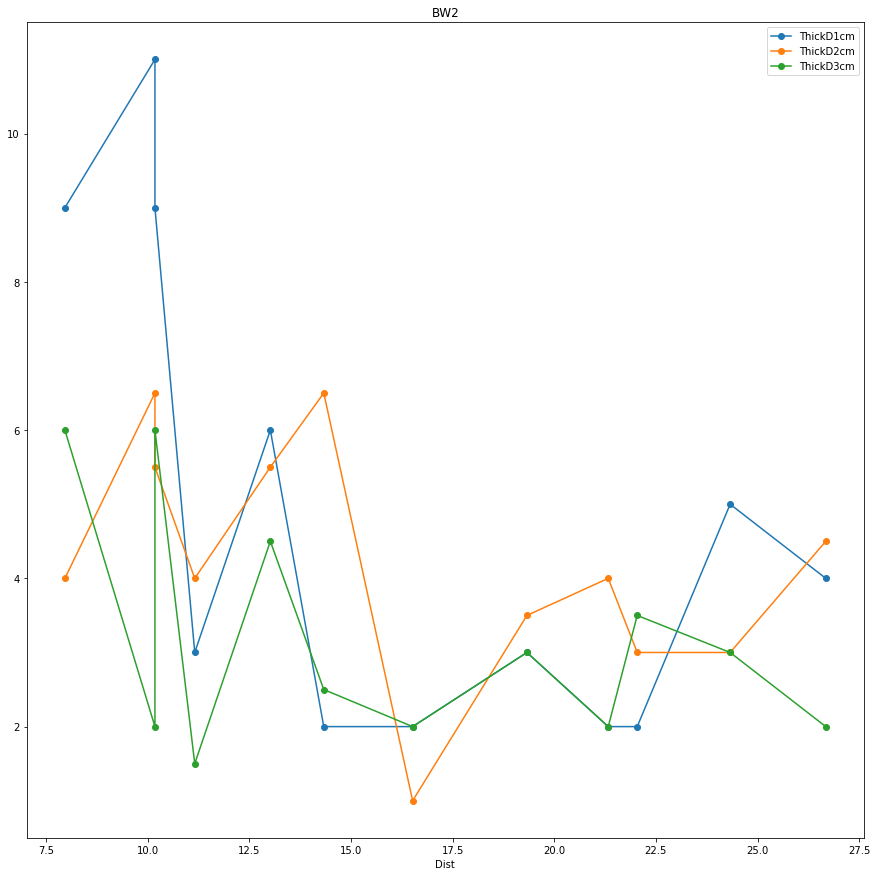

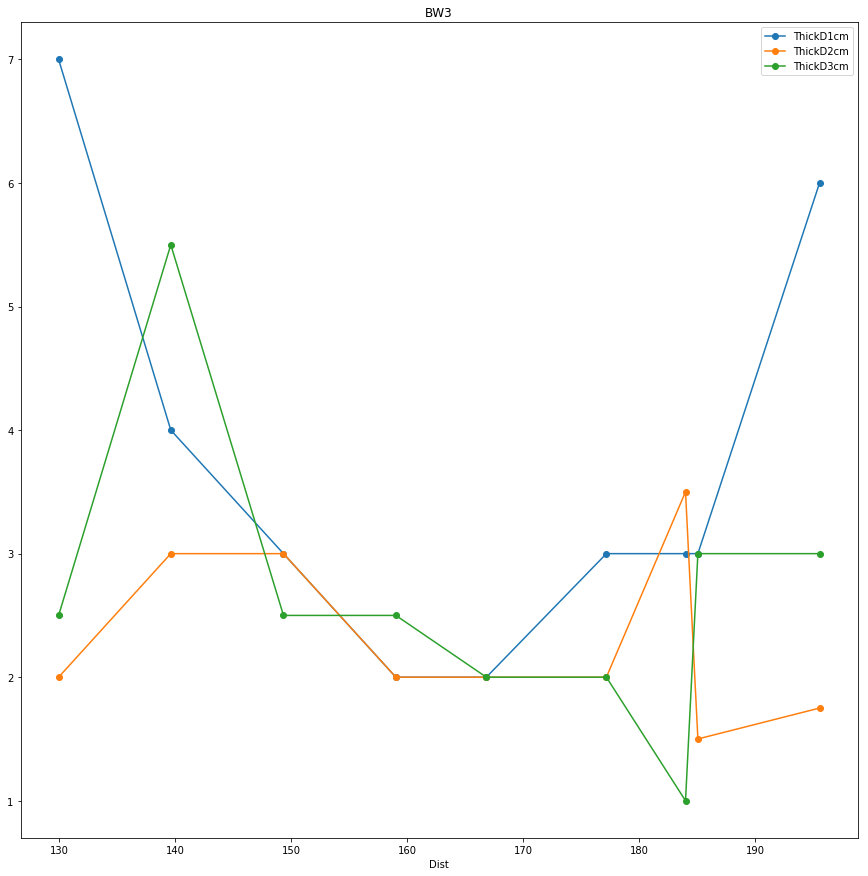

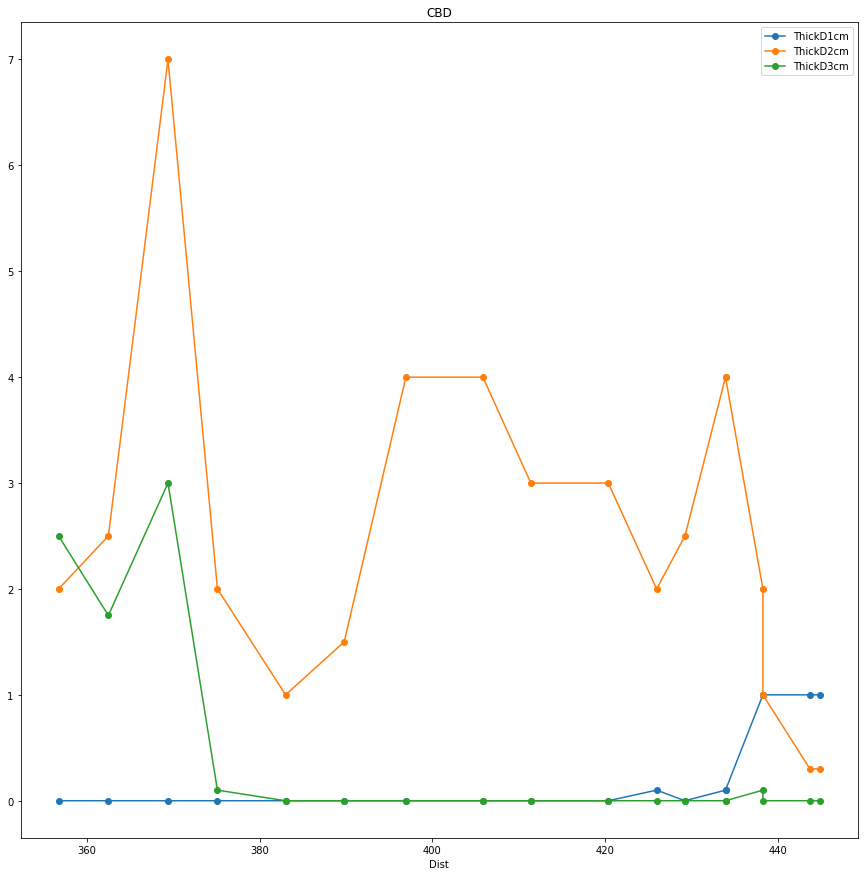

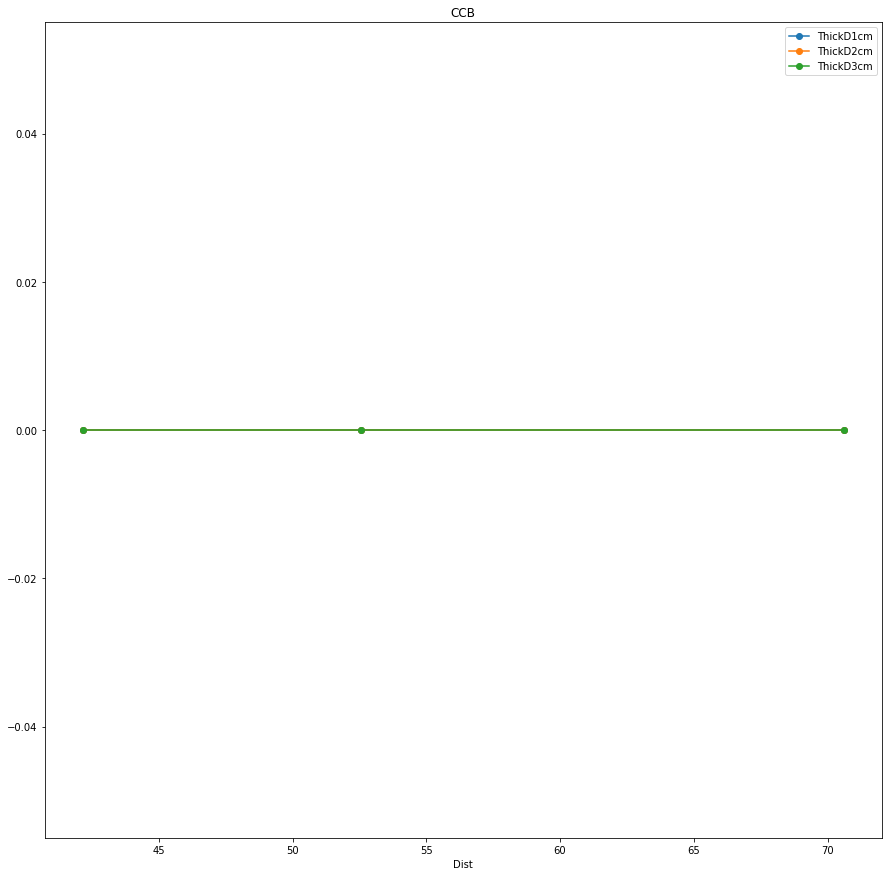

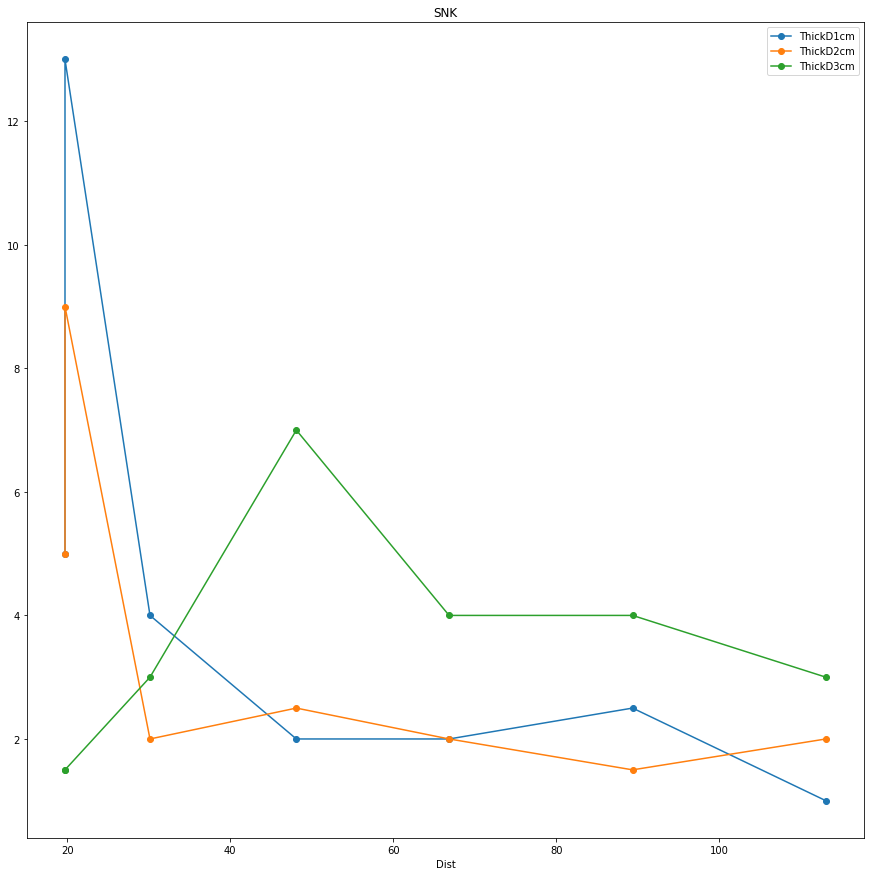

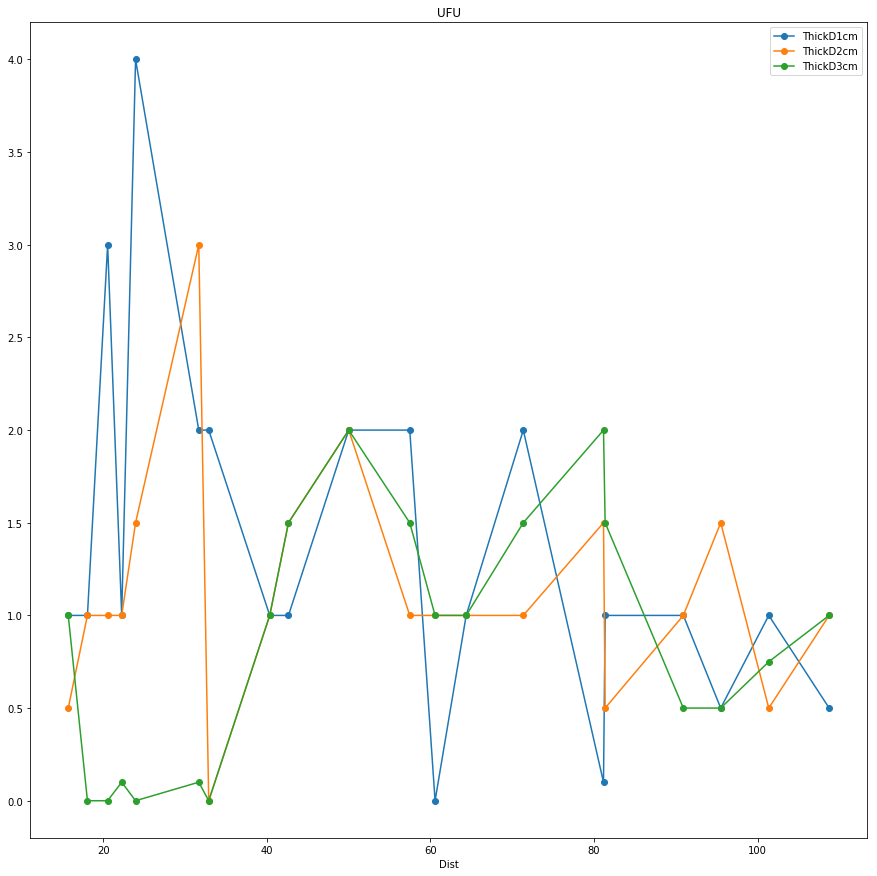

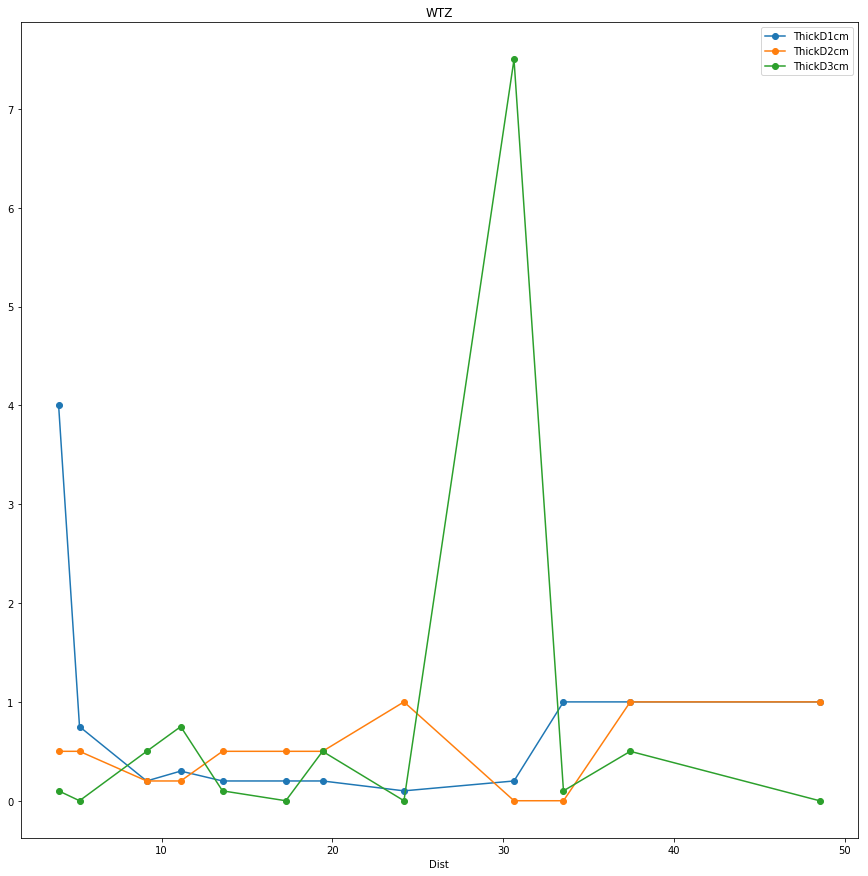

In [174]:
BW2_fig = BW2.plot.line(x = 'Dist', y = ['ThickD1cm', 'ThickD2cm', 'ThickD3cm'], marker = 'o', figsize = (15,15), title = 'BW2')
plt.savefig('BW2_Distance_Dates.png')

BW3_fig = BW3.plot.line(x = 'Dist', y = ['ThickD1cm', 'ThickD2cm', 'ThickD3cm'], marker = 'o', figsize = (15,15), title = 'BW3')
plt.savefig('BW3_Distance_Dates.png')

CBD_fig = CBD.plot.line(x = 'Dist', y = ['ThickD1cm', 'ThickD2cm', 'ThickD3cm'], marker = 'o', figsize = (15,15), title = 'CBD')
plt.savefig('CBD_Distance_Dates.png')

CCB_fig = CCB.plot.line(x = 'Dist', y = ['ThickD1cm', 'ThickD2cm', 'ThickD3cm'], marker = 'o', figsize = (15,15), title = 'CCB')
plt.savefig('CCB_Distance_Dates.png')

SNK_fig = SNK.plot.line(x = 'Dist', y = ['ThickD1cm', 'ThickD2cm', 'ThickD3cm'], marker = 'o', figsize = (15,15), title = 'SNK')
plt.savefig('SNK_Distance_Dates.png')

UFU_fig = UFU.plot.line(x = 'Dist', y = ['ThickD1cm', 'ThickD2cm', 'ThickD3cm'], marker = 'o', figsize = (15,15), title = 'UFU')
plt.savefig('UFU_Distance_Dates.png')

WTZ_fig = WTZ.plot.line(x = 'Dist', y = ['ThickD1cm', 'ThickD2cm', 'ThickD3cm'], marker = 'o', figsize = (15,15), title = 'WTZ')
plt.savefig('WTZ_Distance_Dates.png')

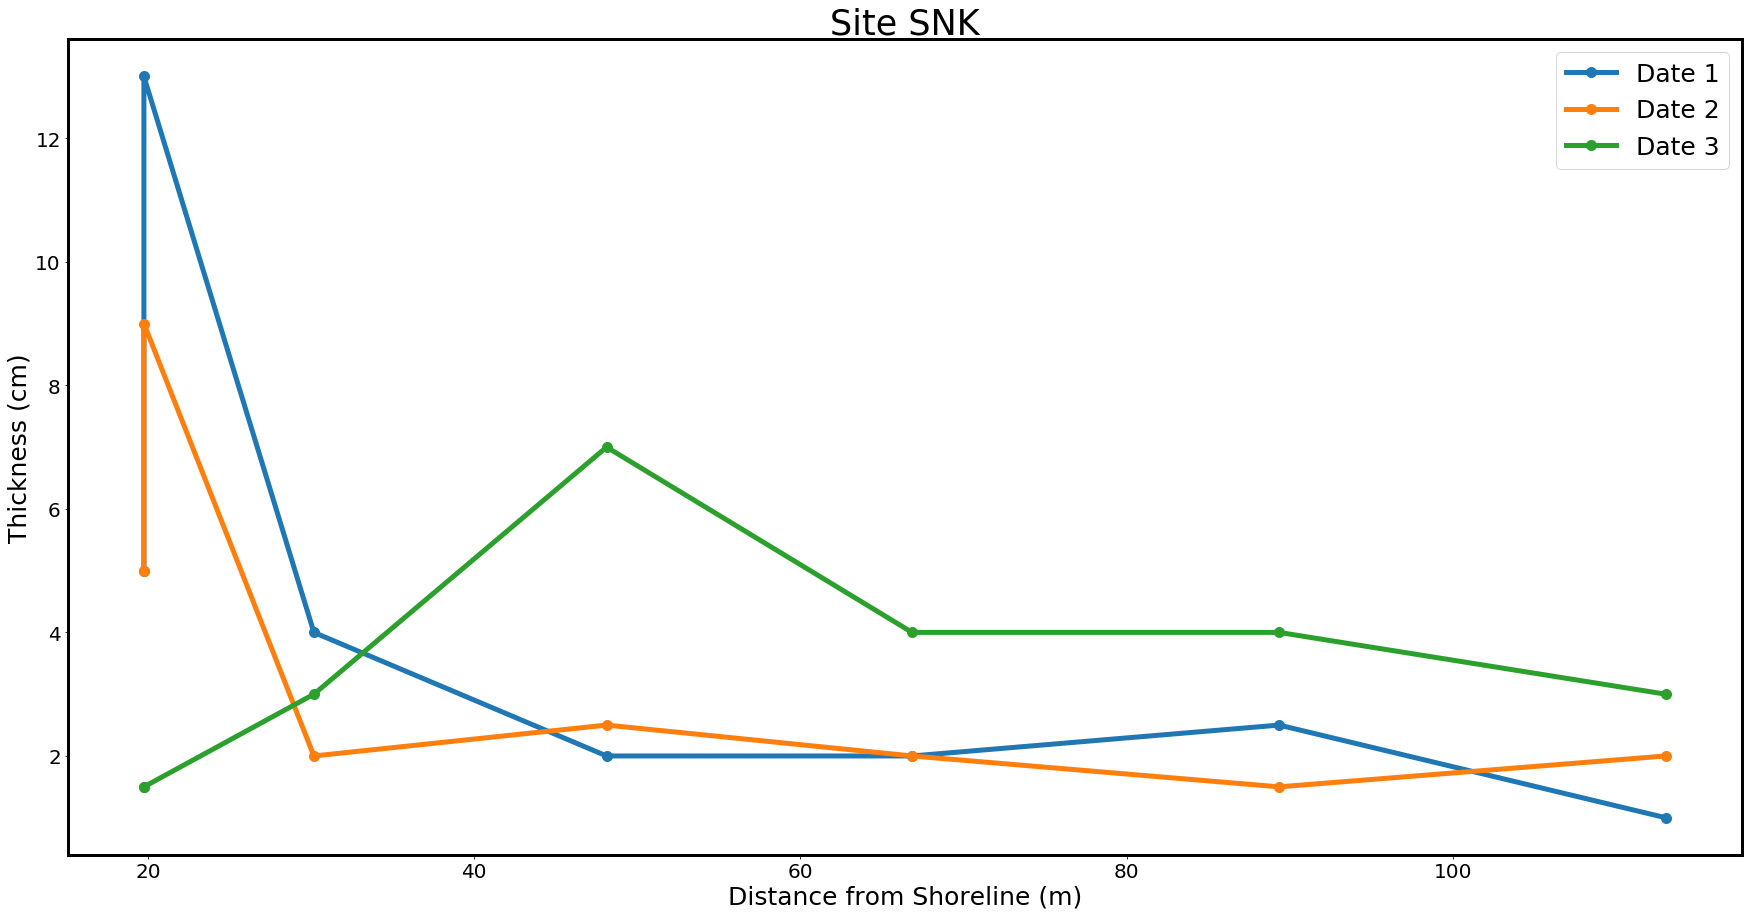

In [202]:
SNK.plot.line(x = 'Dist', y = ['ThickD1cm', 'ThickD2cm', 'ThickD3cm'], marker = 'o', markersize = 10, figsize = (30,15), linewidth = 5, label = ('Date 1', 'Date 2', 'Date 3'))

plt.title("Site SNK", fontsize =35)
plt.xlabel("Distance from Shoreline (m)", fontsize = 25)
plt.ylabel("Thickness (cm)", fontsize = 25)
plt.legend(prop={'size': 25})
plt.tick_params(axis = 'both', which = 'major', labelsize = 20)

plt.savefig('SNK_Thickness_Relationship.png')